# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [4]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [5]:
snake_columns(websites)
websites.sample(3)

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
774,B0_736,46,7,UTF-8,GSE,6984.0,US,CA,31/07/2000 0:00,29/06/2016 0:00,33,1,5,3244,43,41,24696,4114,43,10.0,0
1648,M4_9,100,20,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
604,B0_2172,42,7,ISO-8859-1,Apache,NaN,US,Indiana,18/07/2002 0:00,10/07/2013 0:00,6,4,4,528,6,8,612,528,6,0.0,0


In [6]:
df=websites.copy()

In [7]:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
number_special_characters,0,0
charset,7,0
server,176,0
content_length,812,0
whois_country,306,0
whois_statepro,362,0
whois_regdate,127,0
whois_updated_date,139,0


In [8]:
df.nunique().sort_values(ascending=False)

url                          1781
whois_regdate                 890
source_app_bytes              885
app_bytes                     825
remote_app_bytes              822
content_length                637
whois_updated_date            593
server                        238
whois_statepro                181
url_length                    142
remote_app_packets            116
app_packets                   113
source_app_packets            113
tcp_conversation_exchange     103
dist_remote_tcp_port           66
whois_country                  48
number_special_characters      31
remote_ips                     18
dns_query_times                10
charset                         8
type                            2
dtype: int64

In [9]:
df.describe()

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [10]:
# Your code here
num_corr = df.select_dtypes(include=['number']).corr().round(2)


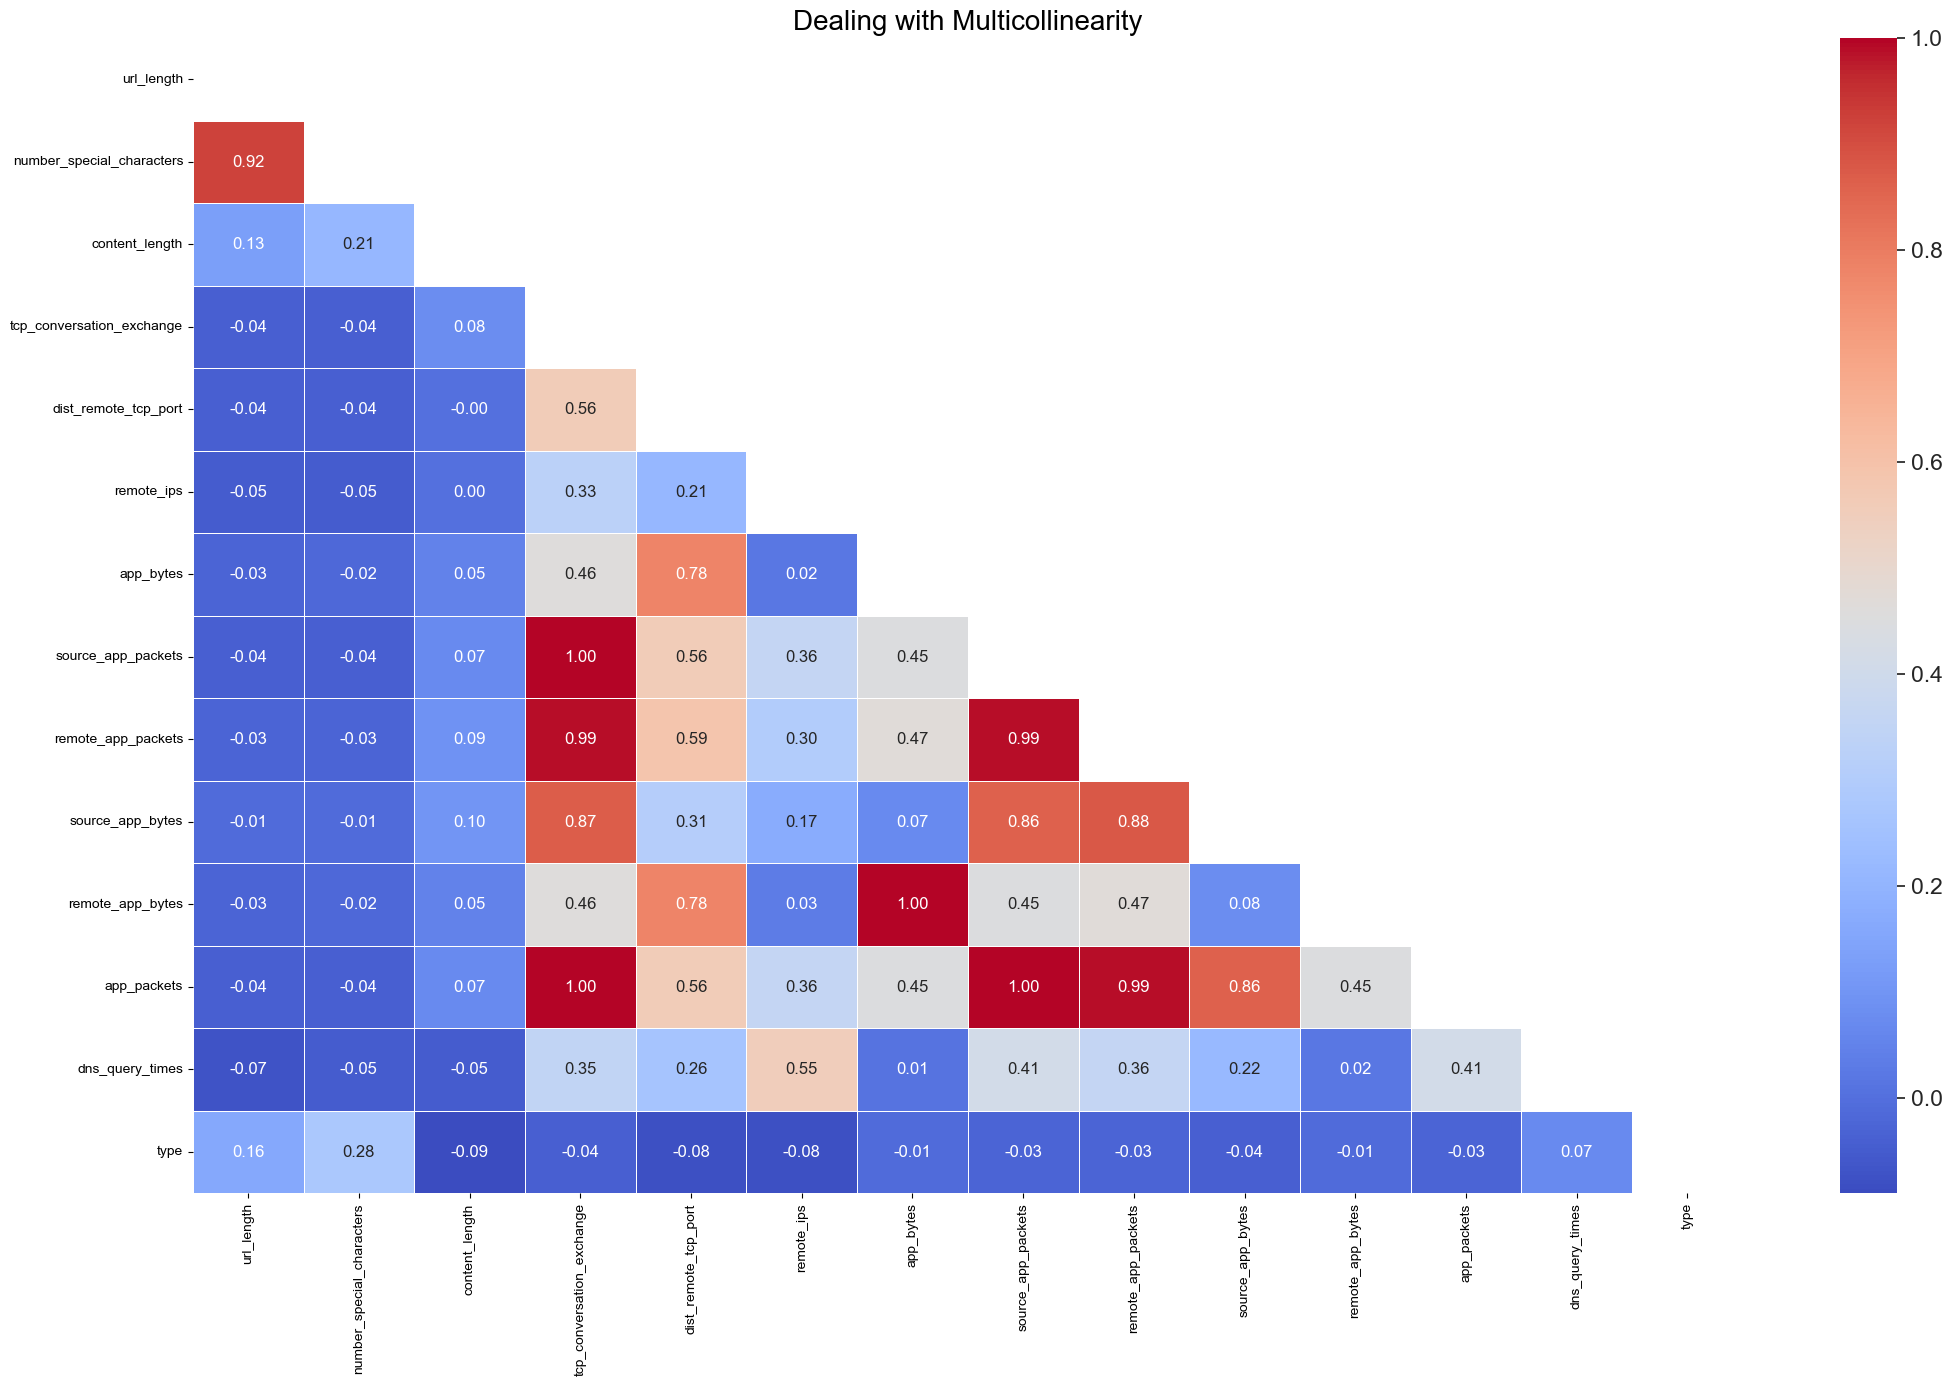

In [11]:
# Your comment here
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
# Your code here
df.columns


Index(['url', 'url_length', 'number_special_characters', 'charset', 'server',
       'content_length', 'whois_country', 'whois_statepro', 'whois_regdate',
       'whois_updated_date', 'tcp_conversation_exchange',
       'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

In [13]:
# Your comment here
columns_to_drop = ["app_packets", "remote_app_packets", "source_app_packets",'remote_app_bytes','number_special_characters']
df = df.drop(columns=columns_to_drop)


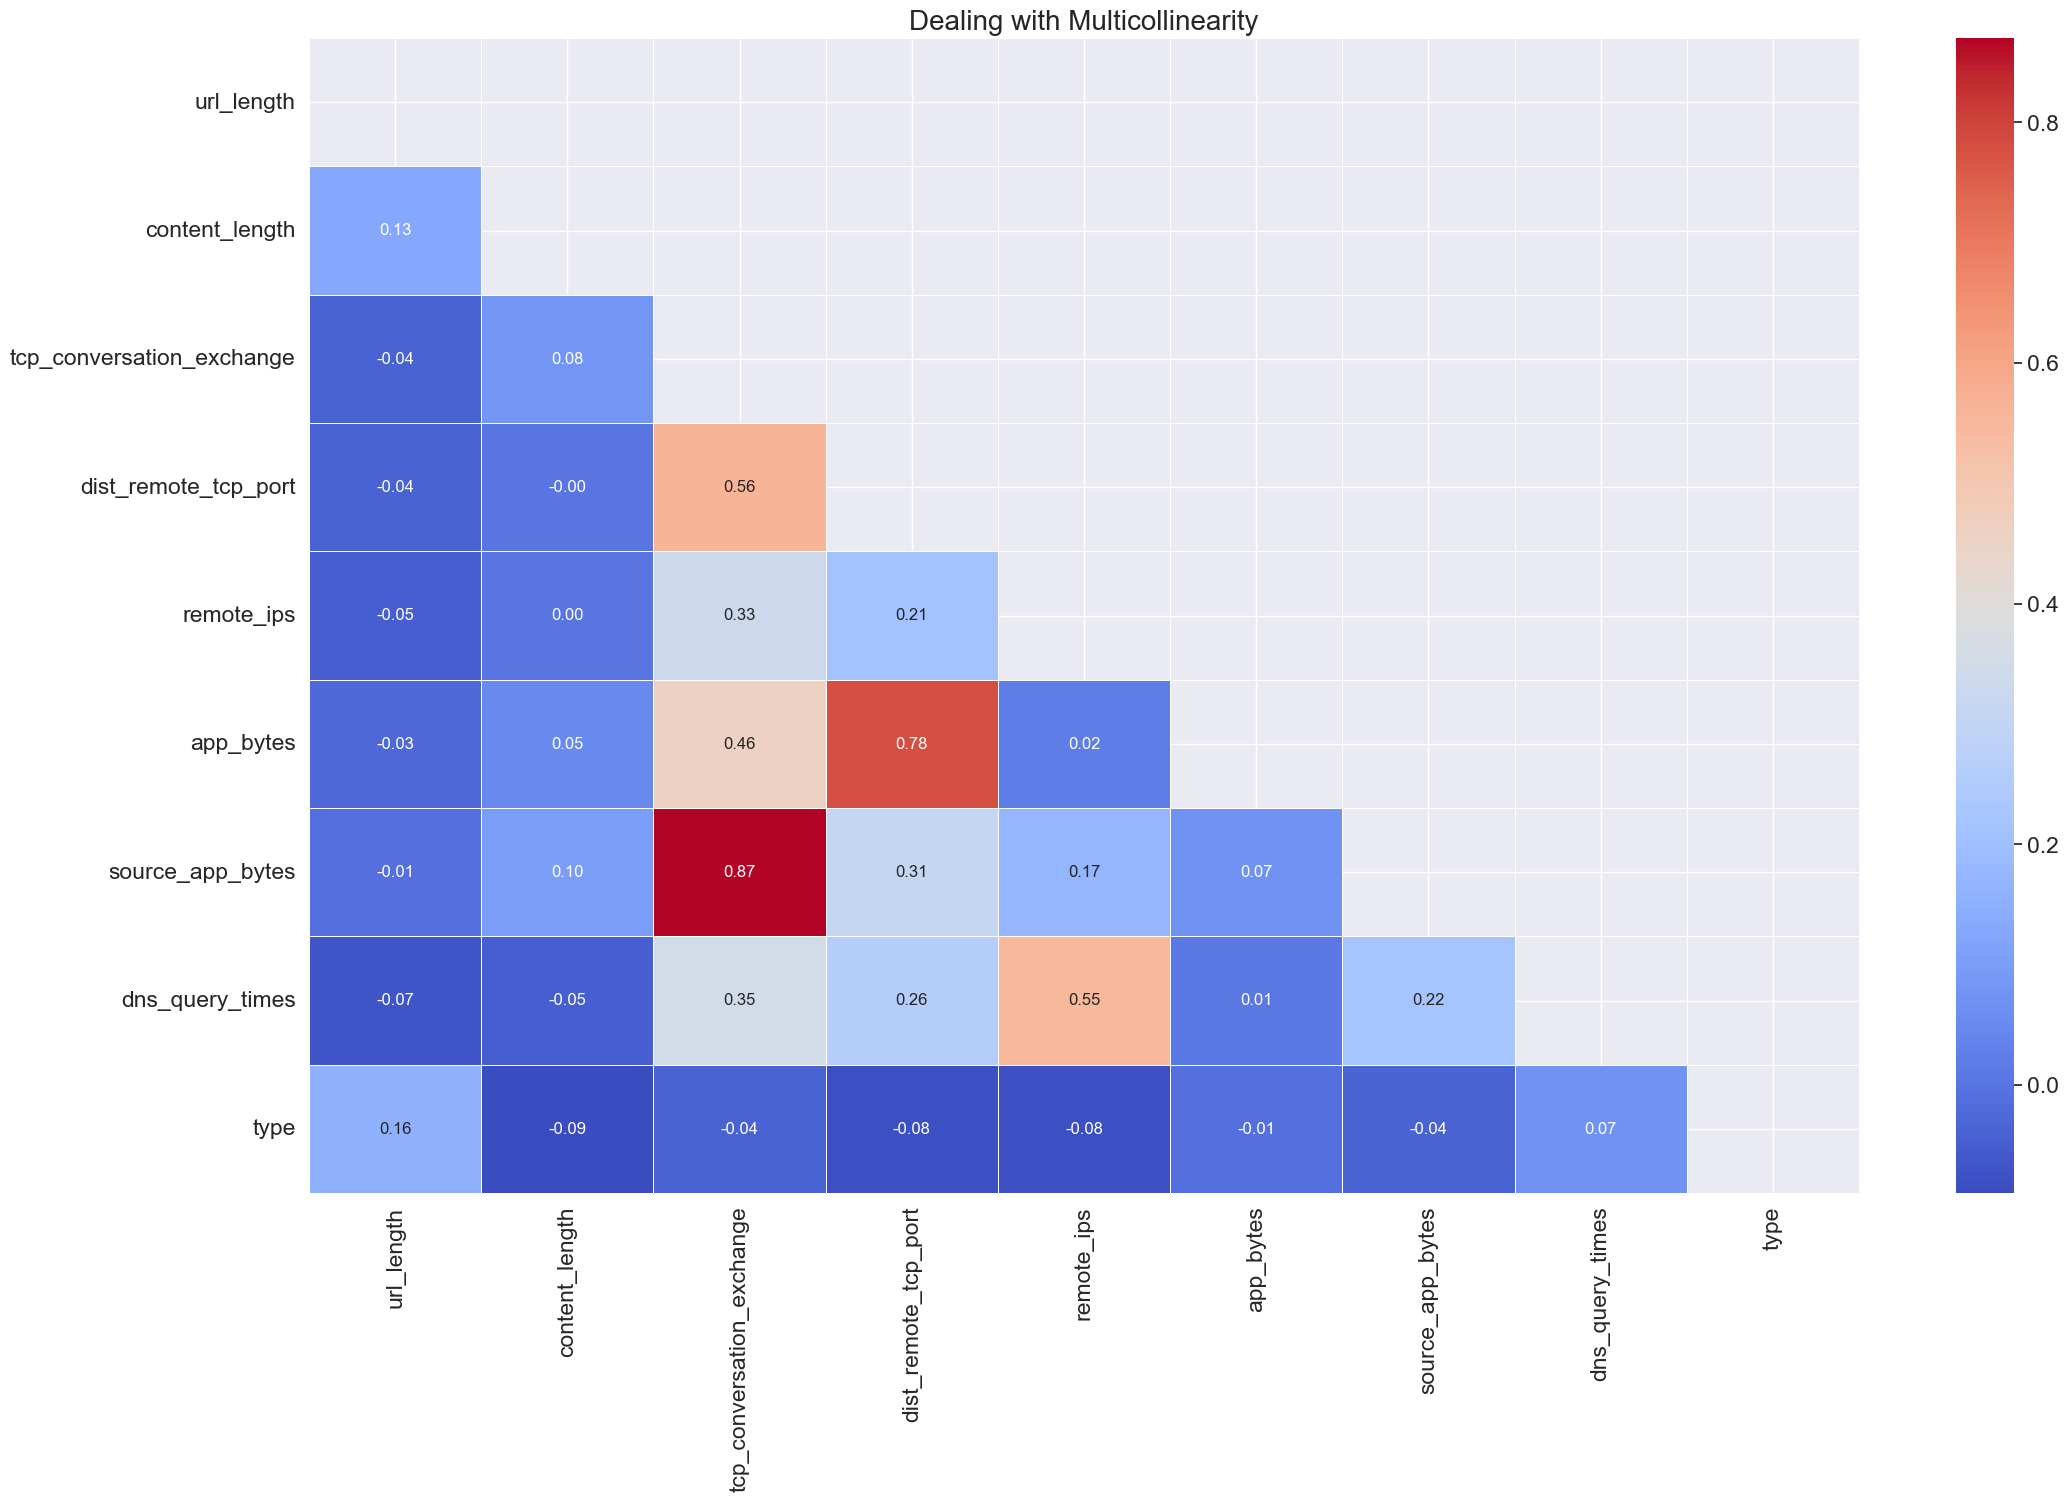

In [14]:
# Print heatmap again
num_corr1 = df.select_dtypes(include=['number']).corr().round(2)

mask = np.zeros_like(num_corr1)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr1, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [15]:
# Your code here
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
charset,7,0
server,176,0
content_length,812,0
whois_country,306,0
whois_statepro,362,0
whois_regdate,127,0
whois_updated_date,139,0
tcp_conversation_exchange,0,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [16]:
# Your code here
df.shape

(1781, 16)

In [17]:
# Your comment here
df = df.drop('content_length', axis=1)

In [18]:
df_cleaned = df.dropna()

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
# Examine missing values in each column
explore_data(df_cleaned)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
charset,0,0
server,0,0
whois_country,0,0
whois_statepro,0,0
whois_regdate,0,0
whois_updated_date,0,0
tcp_conversation_exchange,0,0
dist_remote_tcp_port,0,0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
# Your code here
df_cleaned.nunique().sort_values(ascending=False)

url                          1257
whois_regdate                 679
source_app_bytes              589
app_bytes                     568
whois_updated_date            486
server                        193
whois_statepro                173
url_length                    132
tcp_conversation_exchange      97
dist_remote_tcp_port           59
whois_country                  40
remote_ips                     17
dns_query_times                 9
charset                         7
type                            2
dtype: int64

In [21]:
unique_values = df_cleaned['whois_country'].unique()
unique_values

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [22]:
# Mapea los valores a códigos de país consistentes
country_mapping = {
    'Cyprus': 'CY',
    'us': 'United States',
    'Sweden': 'SE',
    'GB': 'United Kingdom',
    'United Kingdom':'UK',
    "[u'GB'; u'UK']": "UK",
    'se':'SE',
    'United States':'US'
}

# Aplica el mapeo a la columna 'whois_country'
df_cleaned['whois_country'] = df_cleaned['whois_country'].replace(country_mapping)


In [23]:
unique_values = df_cleaned['whois_country'].unique()
unique_values

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'United Kingdom', 'UK',
       'NL', 'UG', 'JP', 'CN', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH', 'LV',
       'TR', 'ES', 'United States', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL',
       'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [24]:
# Your code here
country_counts = df_cleaned['whois_country'].value_counts()
country_counts

whois_country
US                957
CA                 75
ES                 63
AU                 26
PA                 21
United Kingdom     13
JP                 10
UK                  9
IN                  8
CN                  8
CZ                  8
NL                  5
CH                  5
BS                  4
ru                  4
AT                  4
KY                  3
PH                  3
SC                  3
United States       3
HK                  2
UA                  2
UY                  2
KG                  2
SI                  2
RU                  2
TR                  1
UG                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
LV                  1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [25]:
# Your code here
top_countries = df_cleaned['whois_country'].value_counts().nlargest(10).index

# Etiquetar los valores no incluidos en los 10 principales como 'OTHER'
df_cleaned['whois_country'] = np.where(df_cleaned['whois_country'].isin(top_countries), df_cleaned['whois_country'], 'OTHER')
df_cleaned.sample(3)

,url,url_length,charset,server,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_bytes,dns_query_times,type
995,B0_2131,53,UTF-8,nginx/1.11.10,CA,Quebec,21/05/1997 0:00,26/07/2016 0:00,7,6,2,798,492,0.0,0
721,B0_585,45,iso-8859-1,Apache,AU,VIC,12/03/2009 1:58,18/04/2017 1:29,3,0,1,198,186,0.0,0
1113,B0_458,57,ISO-8859-1,Apache/2.2.15 (CentOS) DAV/2 mod_ssl/2.2.15 Op...,US,IL,12/12/1990 0:00,8/06/2015 0:00,79,2,7,5863,127368,4.0,0


In [26]:
top_countries

Index(['US', 'CA', 'ES', 'AU', 'PA', 'United Kingdom', 'JP', 'UK', 'IN', 'CN'], dtype='object', name='whois_country')

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [27]:
# Your code here
columns_to_drop = ['whois_statepro','whois_regdate','whois_updated_date']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [28]:
df_cleaned.columns

Index(['url', 'url_length', 'charset', 'server', 'whois_country',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_bytes', 'dns_query_times', 'type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [29]:
# Your code here
df_cleaned.dtypes


url                           object
url_length                     int64
charset                       object
server                        object
whois_country                 object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
# Your code here
df_cleaned=df_cleaned.drop("url",axis=1)

In [31]:
df_cleaned.dtypes


url_length                     int64
charset                       object
server                        object
whois_country                 object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_bytes               int64
dns_query_times              float64
type                           int64
dtype: object

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
# Your code here
df_cleaned.columns

Index(['url_length', 'charset', 'server', 'whois_country',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_bytes', 'dns_query_times', 'type'],
      dtype='object')

In [33]:
valores_unicos_charset= df_cleaned['charset'].unique()
valores_unicos_charset


array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

In [34]:
df_cleaned['charset'] = df_cleaned['charset'].str.lower()

In [35]:
valores_unicos_charset= df_cleaned['charset'].unique()
valores_unicos_charset

array(['iso-8859-1', 'utf-8', 'us-ascii', 'windows-1251', 'windows-1252'],
      dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [36]:
# Your code here
valores_unicos_charset= df_cleaned['server'].unique()
valores_unicos_charset


array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.4.6 (C

![Think Hard](../images/think-hard.jpg)

In [37]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [38]:
# Your code here
def clean_server_column(df_cleaned):
    df_cleaned['server'] = df_cleaned['server'].str.lower()

    def label_server(row):
        return 'Microsoft' if 'microsoft' in row else ('Apache' if 'apache' in row else ('nginx' if 'nginx' in row else 'Other'))

    df_cleaned['server'] = df_cleaned['server'].apply(label_server)
    return df_cleaned



In [39]:
df_cleaned = clean_server_column(df_cleaned)

In [40]:
# Count `SERVER` value counts here
valores_unicos_charset= df_cleaned['server'].unique()
valores_unicos_charset


array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [41]:
df_cleaned.nunique().sort_values(ascending=False)

source_app_bytes             589
app_bytes                    568
url_length                   132
tcp_conversation_exchange     97
dist_remote_tcp_port          59
remote_ips                    17
whois_country                 11
dns_query_times                9
charset                        5
server                         4
type                           2
dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [42]:
# Your code here
df_cleaned_dummy = pd.get_dummies(df_cleaned[['server', 'charset', 'whois_country']])
df_cleaned_dummy = df_cleaned_dummy * 1
df_cleaned_dummy['type'] = df_cleaned['type']

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [43]:
# Your code here
df_cleaned_dummy.columns

Index(['server_Apache', 'server_Microsoft', 'server_Other', 'server_nginx',
       'charset_iso-8859-1', 'charset_us-ascii', 'charset_utf-8',
       'charset_windows-1251', 'charset_windows-1252', 'whois_country_AU',
       'whois_country_CA', 'whois_country_CN', 'whois_country_ES',
       'whois_country_IN', 'whois_country_JP', 'whois_country_OTHER',
       'whois_country_PA', 'whois_country_UK', 'whois_country_US',
       'whois_country_United Kingdom', 'type'],
      dtype='object')

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [44]:
from sklearn.model_selection import train_test_split

# Your code here:


X = df_cleaned_dummy.drop(columns=['type'])
y = df_cleaned_dummy['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'100% of our data: {len(df_cleaned_dummy)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1257.
70% for training data: 1005.
30% for test data: 252.


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [45]:
# Your code here:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [46]:
# Your code here:
predictions = model.predict(X_test)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [47]:
# Your code here:
print(f'30% for test prediction data: {len(predictions)}.')


30% for test prediction data: 252.


In [48]:
# Your conclusions here:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       224
           1       0.91      0.36      0.51        28

    accuracy                           0.92       252
   macro avg       0.92      0.68      0.74       252
weighted avg       0.92      0.92      0.91       252



What are your thoughts on the performance of the model? Write your conclusions below.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [49]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [56]:
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [57]:
# Your code here:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here